<h1>Ťaháky:  Modul Pandas DataFrame Object</h1>

Version 30 April 2017 - [Draft – Mark Graph – mark.the.graph@gmail.com – @Mark_Graph on twitter]<br>
Plus moje poznámky a doplnenia - Viera Marion Rajnáková novemer 2022

<div class="alert alert-block alert-warning">
<b>Príprava</b> 
</div>

**Vždy začnite importovaním týchto modulov Pythonu**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series

*Poznámka:* toto sú odporúčané prezývky pre import<br> 
*Poznámka:* môžete ich vložiť do súboru PYTHONSTARTUP 

<div class="alert alert-block alert-warning">
<b>Konvencie ťahákov</b> 
</div>

**Príklady kódu**

In [ ]:
# Code examples are found in yellow boxes

V príkladoch kódu zvyčajne používam skratky premenných: 
- s predstavuje objekt Series pandas
- df predstavuje objekt DataFrame pandas
- idx predstavuje objekt indexu pandas
- t – n-tica (tuple)
- l – zoznam (list)
- b – boolovská hodnota (bolean)
- i – celé číslo (integer)
- a – numpy pole (area)
- st – reťazec (string)
- d – slovník (dictionary)
- e – spojenie (engine)
- ts - časová pečiatka (timestamp) atď.


<div class="alert alert-block alert-warning">
<b>Koncepčný model</b> 
</div>

**Objekt DataFrame:** je dvojrozmerná tabuľka údajov s indexmi stĺpcov a riadkov (niečo ako spread list). Stĺpce sú tvorené objektmi série. 

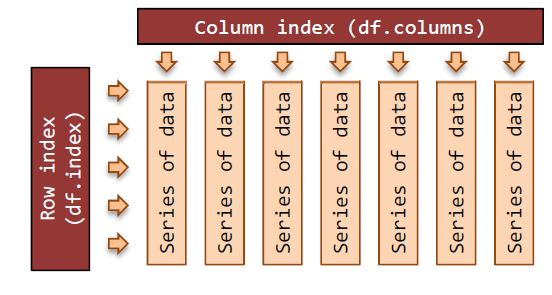

**DataFrame má dva indexy:**
- Index stĺpcov (df.columns) je zvyčajne zoznam reťazcov (názvy premenných) alebo (menej často) celé čísla<br>
- Index riadka (df.index) môže byť zvyčajne:<br>
    • - celé čísla<br>
    • - pre čísla prípadu alebo riadkov; reťazce<br>
    • – pre názvy prípadov; alebo o DatetimeIndex alebo PeriodIndex – pre časové rady <br><br>

**Objekt Series:** usporiadané, jednorozmerné pole údajov s indexom. Všetky údaje v Series sú rovnaký dátový typ. Series aritmetika sa vektorizuje po prvom zarovnaní indexu Series pre každý z operandov. 

In [ ]:
s1 = Series(range(0,4)) # -> 0, 1, 2, 3
s2 = Series(range(1,5)) # -> 1, 2, 3, 4
s3 = s1 + s2 # -> 1, 3, 5, 7

<div class="alert alert-block alert-warning">
<b>Prenos údajov do Dataframu</b> 
</div>

**Vytvorenie prázdneho DataFramu**

In [ ]:
df = DataFrame()

**Načítanie DataFrame zo súboru CSV**

In [ ]:
df = pd.read_csv('file.csv') # often works
df = pd.read_csv('file.csv', header=0,
                 index_col=0, quotechar='"', sep=':',
                 na_values = ['na', '-', '.', ''])

*Poznámka:* všetky argumenty nájdete v dokumentácii k pandas 

**Získanie údajov z vloženého textu CSV do DataFramu**

In [ ]:
from io import StringIO
data = """, Animal, Cuteness, Desirable
row-1,	dog,	8.7,	True
row-2,	cat,	9.5,	True
row-3,	bat,	2.6,	False"""
df = pd.read_csv(StringIO(data), header=0,
                 index_col=0, skipinitialspace=True)

*Poznámka:* `skipinitialspace=True` umožňuje pekné rozloženie

**Načítanie DataFrame zo súboru Microsoft Excel**

In [ ]:
# Každý hárok Excelu do slovníka Pythonu 
workbook = pd.ExcelFile('file.xlsx')
d = {} # začnite s prázdnym slovníkom 
for sheet_name in workbook.sheet_names:
    df = workbook.parse(sheet_name)
    d[sheet_name] = df

*Poznámka:* Metóda `parse()` má veľa argumentov, ako napr. `read_csv()` vyššie. Pozrite si dokumentáciu k pandas. 

**Načítanie DataFrame z databázy MySQL**

In [ ]:
import pymysql
from sqlalchemy import create_engine
engine = create_engine('mysql+pymysql://'
                       +'USER:PASSWORD@HOST/DATABASE')
df = pd.read_sql_table('table', engine)

**Spojenie údajov Series do DataFramu**

In [ ]:
# Príklad 1 ...
s1 = Series(range(6))
s2 = s1 * s1
s2.index = s2.index + 2 # nesprávne zarovnanie indexov 
df = pd.concat([s1, s2], axis=1)

# Príklad 2 ...
s3 = Series({'Tom':1, 'Dick':4, 'Har':9})
s4 = Series({'Tom':3, 'Dick':2, 'Mar':5})
df = pd.concat({'A':s3, 'B':s4 }, axis=1)

*Poznámka:* 1. metóda má celočíselné označenia stĺpcov<br> 
*Poznámka:* 2. spôsob nezaručuje poradie 

**Získanie DataFrame zo slovníka Python**

In [ ]:
# predvolené --- predpokladajme, že údaje sú v stĺpcoch 
df = DataFrame({
'col0' : [1.0, 2.0, 3.0, 4.0],
'col1' : [100, 200, 300, 400]
})

**Získanie DataFrame z údajov v slovníka Python**

In [ ]:
# --- použite pomocnú metódu pre údaje v riadkoch 
df = DataFrame.from_dict({ # dáta z riadkov
    # riadky ako pythonovské slovníky 
    'row0' : {'col0':0, 'col1':'A'},
    'row1' : {'col0':1, 'col1':'B'}
}, orient='index')

df = DataFrame.from_dict({ # dáta z riadkov
    # riadky ako pythonovské listy/zoznamy
    'row0' : [1, 1+1j, 'A'],
    'row1' : [2, 2+2j, 'B']
}, orient='index')

**Vytvorte skúšobné/falošné údaje (užitočné na testovanie)**

In [ ]:
# --- jednoduché - predvolené celočíselné indexy 
df = DataFrame(np.random.rand(50,5))

# --- s indexom riadku časovej pečiatky: 
df = DataFrame(np.random.rand(500,5))
df.index = pd.date_range('1/1/2005',
                         periods=len(df), freq='M')

# --- s abecednými indexmi riadkov a stĺpcov 
# a "zoskupiteľnými" premennými 
import string
import random
rows = 52
cols = 5
assert(1 <= rows <= 52) # min/max počet riadkov 
df = DataFrame(np.random.randn(rows, cols),
               columns=['c'+str(i) for i in range(cols)],
               index=list((string.ascii_uppercase +
                           string.ascii_lowercase)[0:rows]))
df['groupable'] = [random.choice('abcde')
                   for _ in range(rows)]

<div class="alert alert-block alert-warning">
<b>Uloženie DataFramu</b> 
</div>

**Uloženie DataFramu do CSV súboru**

In [ ]:
df.to_csv('name.csv', encoding='utf-8')

**Uloženie DataFramu do Excel pracovného zošita**

In [ ]:
from pandas import ExcelWriter
writer = ExcelWriter('filename.xlsx')
df1.to_excel(writer,'Sheet1')
df2.to_excel(writer,'Sheet2')
writer.save()

**Uloženie DataFramu do MySQL**

In [ ]:
import pymysql
from sqlalchemy import create_engine
e = create_engine('mysql+pymysql://' +
                  'USER:PASSWORD@HOST/DATABASE')
df.to_sql('TABLE',e, if_exists='replace')

*Poznámka:* `if_exists -> 'fail', 'replace', 'append'`

**Uloženie do Python objektu**

In [ ]:
d = df.to_dict() # do slovníka
str = df.to_string() # do reťazca
m = df.as_matrix() # do numpy matrice

<div class="alert alert-block alert-warning">
<b>Práca s celým DataFramom</b> 
</div>

**Zobrazenie obsahu/štruktúry DataFramu**

In [ ]:
df.info() # index & dátove typy
dfh = df.head(i) # zobrazí prvých päť riadkov
dft = df.tail(i) # zobrazí posledných päť riadkov
dfs = df.describe() # súhrnná štatistika stĺpcov
top_left_corner_df = df.iloc[:4, :4]

**Atribúty DataFramu bez indexov**

In [ ]:
df = df.T # transponovanie riadkov a stĺpcov 
l = df.axes # indexy riadkov a stĺpcov v zozname
(r_idx, c_idx) = df.axes # from above (zhora)
s = df.dtypes # dátove typy Series
b = df.empty # či je DataFrame prázdny
i = df.ndim # koľko rozmerný je DataFrame (štandardne 2)
t = df.shape # počet riadkov a stĺpcov v tuple
i = df.size # veľkosť DataFramu = počet riadkov * počet stĺpcov
a = df.values # zobrazí hodnoty

**Užitočné metódy DataFramu**

In [ ]:
df = df.copy() # urobí kópiu DataFramu
df = df.rank() # ohodnotiť každý stĺpec (predvolené) 
df = df.sort_values(by=col)
df = df.sort_values(by=[col1, col2])
df = df.sort_index()
df = df.astype(dtype) # zmena dátového typu na iný

**Iteračné metódy DataFramu**

In [ ]:
df.iteritems() # Iteruje cez stĺpce DataFrame a vracia n-ticu s názvom stĺpca a obsahom ako Series. Zastarané od verzie 1.5.0: Iteritems je zastarané a bude odstránené v budúcej verzii. Namiesto toho použite .items.  
df.iterrows() # Iterujte cez riadky DataFrame ako páry (index, Series) 
# príklad ... iterovanie cez stĺpce  ...
for (name, series) in df.iteritems():
    print('\nCol name: ' + str(name))
    print('1st value: ' + str(series.iat[0]))

**Matematické metódy nad celým DataFramom (nie je to úplný zoznam)**

In [ ]:
df = df.abs() # absolútna hodnota
df = df.add(o) # pridanie DataFramu, Series alebo hodnoty
s = df.count() # počet nenulových hodnôt v riadku alebo stĺpci
df = df.cummax() # kumulatívne maximum
df = df.cummin() # kumulatívne minimum
df = df.cumsum() # kumulatívny súčet
df = df.diff() # Vypočíta rozdiel prvku DataFrame v porovnaní s iným prvkom v DataFrame (predvolený je prvok v predchádzajúcom riadku). 
df = df.div(o) # vracia desatinné delenie DataFrame, Series, hodnôt
df = df.dot(o) # Táto metóda vypočíta maticový súčin medzi DataFrame a hodnotami iného radu, DataFrame alebo numpy poľa. 
s = df.max() # Vráti maximum hodnôt na požadovanej osi. 
s = df.mean() # Vráti priemer hodnôt na požadovanej osi. 
s = df.median() # Vráťte medián hodnôt na požadovanej osi. 
s = df.min() # Vráti minimum hodnôt na požadovanej osi. 
df = df.mul(o) # násobenie dátového rámca a iné, elementárne (binárny operátor mul). 
s = df.sum() # Vráti súčet hodnôt na požadovanej osi. 
df = df.where(df > 0.5, other=np.nan)

*Poznámka:* Metódy, ktoré vracajú predvolené Series, aby fungovali na stĺpcoch

**Výber/filtrovanie riadkov/stĺpcov na základe hodnôt indexových štítkov**

In [ ]:
df = df.filter(items=['a', 'b']) #filtrovanie po stĺpcoch
df = df.filter(items=[5], axis=0) # filtrovanie po riadkoch
df = df.filter(like='x') # ponechať x v stĺpci 
df = df.filter(regex='x') # regulárny výraz  v stĺpci
df = df.select(lambda x: not x%5) # 5. riadok

*Poznámka:* select preberá booleovskú funkciu, pre stĺpce: axis=1<br> 
*Poznámka:* predvolený filter sú stĺpce; vyberte predvolené hodnoty pre riadky 

<div class="alert alert-block alert-warning">
<b>Práca so stĺpcami</b> 
</div>

**Získanie indexu stĺpcov a štítkov**

In [ ]:
idx = df.columns # Označenia stĺpcov DataFrame. 
label = df.columns[0] # pomenovanie prvého stĺpca
l = df.columns.tolist() #zoznam stĺpcov do zoznamu
a = df.columns.values # hodnoty stĺpcov

**Zmena pomenovaní stĺpcov**

In [ ]:
df = df.rename(columns={'old':'new','a':'1'})
df.columns = ['new1', 'new2', 'new3']

**Výber stĺpcov**

In [ ]:
s = df['colName'] # vyselektovanie stĺpca cez Series
df = df[['colName']] # vyselektovanie stĺpca z DataFramu
df = df[['a','b']] # vyselektovanie 2 stĺpcov
df = df[['c','a','b']] # zmena poradia stĺpcov
s = df[df.columns[0]] # vyselektovanie stĺpca podľa čísla stĺpca
df = df[df.columns[[0, 3, 4]]] # vyselektonie 3 stĺpcov podľa čísla
df = [df.columns[:-1]] # všetky okrem posledného stĺpca 
s = df.pop('c') # vráti a vymaže položku, KeyError, ak sa nenájde.

**Výber stĺpcov s atribútmi Pythonu**

In [ ]:
s = df.a # same as s = df['a']
# cannot create new columns by attribute
df.existing_column = df.a / df.b
df['new_column'] = df.a / df.b

*Upozornenie:* názvy stĺpcov musia byť platnými identifikátormi.

**Pridanie nových stĺpcov do DataFrame** 

In [ ]:
df['new_col'] = range(len(df))
df['new_col'] = np.repeat(np.nan,len(df))
df['random'] = np.random.rand(len(df))
df['index_as_col'] = df.index
df1[['b','c']] = df2[['e','f']]
df3 = df1.append(other=df2)

*Upozornenie:* Pri pridávaní nového stĺpca sa použijú iba položky z nového Series, ktoré majú zodpovedajúci index v DataFrame, budú pridané.<br> Prijímajúci DataFrame je nie je rozšírený tak, aby vyhovoval novému Series.<br>  
*Upozornenie:* Pri pridávaní pythonského zoznamu alebo numpy poľa, stĺpec bude pridaný podľa pozície celého čísla.<br>  

**Výmena obsahu stĺpca**

In [ ]:
df[['B', 'A']] = df[['A', 'B']]

**Odstránenie stĺpcov (väčšinou podľa pomenovania)**

In [ ]:
df = df.drop('col1', axis=1)
df.drop('col1', axis=1, inplace=True)
df = df.drop(['col1','col2'], axis=1)
s = df.pop('col') # odstránenie stĺpca z DataFramu
del df['col'] # funguje aj klasický python 
df = df.drop(df.columns[0], axis=1)# prvý stĺpec
df = df.drop(df.columns[-1:],axis=1)# posledný stĺpec

**Vektorová aritmetika na stĺpcoch**

In [ ]:
df['proportion']=df['count']/df['total']
df['percent'] = df['proportion'] * 100.0

**Použitie numpy matematických funkcií na stĺpce**

In [ ]:
df['log_data'] = np.log(df['col1'])

*Poznámka:* oveľa, oveľa viac nudných matematických funkcií<br> 
*Tip:* Uprednostnite matematiku pre pandas pred numpy, kde sa dá. 

**Nastavte hodnoty stĺpcov na základe kritérií**

In [ ]:
df['b'] = df['a'].where(df['a']>0, other=0)
df['d'] = df['a'].where(df.b!=0, other=df.c)

*Poznámka:* kde iné môže byť Series alebo skalár 

**Konverzie dátových typov**

In [ ]:
st = df['col'].astype(str)# Series dtype
a = df['col'].values # numpy oblasť
l = df['col'].tolist() # python zoznam

*Poznámka:* užitočné `dtypes` pre konverziu Series: `int, float, str` <br>
*Upozornenie:* index stratený pri konverzii zo Series na pole alebo zoznam

**Bežné metódy/atribúty pre celý stĺpec**

In [ ]:
value = df['col'].dtype # typ dát
value = df['col'].size # veľkosť stĺpca
value = df['col'].count() # počet nenulových hodnôt
value = df['col'].sum() # súčet hodnôt v stĺpci
value = df['col'].prod() # Vráti súčin hodnôt na požadovanej osi. 
value = df['col'].min()
value = df['col'].max()
value = df['col'].mean() # Vráti priemer hodnôt na požadovanej osi.  aj median()
value = df['col'].cov(df['col2']) # Vypočítajte spoločný rozptyl  so sériou, vylúčte chýbajúce hodnoty. 
s = df['col'].describe() # Vytvorte popisnú štatistiku. 
s = df['col'].value_counts() # Vráti Series obsahujúcu počty jedinečných hodnôt.

**Nájdenie indexového pomenovania pre minimálne/max hodnoty v stĺpci**

In [ ]:
label = df['col1'].idxmin()
label = df['col1'].idxmax()

**Bežné stĺpcové elementárne metódy**

In [ ]:
s = df['col'].isnull()
s = df['col'].notnull() # Zistiť existujúce (nechýbajúce) hodnoty.  nie isnull()
s = df['col'].astype(float)
s = df['col'].abs()
s = df['col'].round(decimals=0)
s = df['col'].diff(periods=1)
s = df['col'].shift(periods=1)
s = df['col'].to_datetime()
s = df['col'].fillna(0) # Doplňte hodnoty NA/NaN pomocou špecifikovanej metódy. 
s = df['col'].cumsum() # kumulatívny súčet stĺpca
s = df['col'].cumprod() # kumulatívny súčin stĺpca
s = df['col'].pct_change(periods=4)
s = df['col'].rolling(window=4,
	min_periods=4, center=False).sum()

**Pripojte stĺpec súčtových riadkov do DataFrame**

In [ ]:
df['Total'] = df.sum(axis=1)

*Poznámka:* tiež platí pre min, max, atď.

**Vynásobenie každého stĺpca v DataFrame podľa Series**

In [ ]:
df = df.mul(s, axis=0) # na zhodných riadkoch 

*Poznámka:* aj add, sub, div, atď.

**Výber stĺpcov s príponami .loc, .iloc a .ix**

In [ ]:
df = df.loc[:, 'col1':'col2'] # vrátane 
df = df.iloc[:, 0:2] # výlučne

*Poznámka:* `.ix` je zastaraná funkcia v starších verziách 1.5.0

**Získanie pozície celého čísla indexového označenia stĺpca**

In [ ]:
i = df.columns.get_loc('col_name')

**Otestovanie, či sú hodnoty indexu stĺpcov jedinečné/monotónne**

In [ ]:
if df.columns.is_unique: pass # ...
b = df.columns.is_monotonic_increasing
b = df.columns.is_monotonic_decreasing

<div class="alert alert-block alert-warning">
<b>Práca s riadkami</b> 
</div>

**Získanie indexu riadkov a pomenovaní**

In [ ]:
idx = df.index # vráti index riadkov
label = df.index[0] # pomenovanie prvého riadku
label = df.index[-1] # pomenovanie posledného riadku
l = df.index.tolist() # pomenovanie riadkov ako zoznam
a = df.index.values # hodnoty riadkov

**Zmena (riadkového) indexu**

In [ ]:
df.index = idx # nový ad hoc index 
df = df.set_index('A') # nastavenie stĺpca A ako index
df = df.set_index(['A', 'B']) # MultiIndex
df = df.reset_index() # Obnovte index DataFrame a namiesto toho použite predvolený. Ak má DataFrame MultiIndex, táto metóda môže odstrániť jednu alebo viac úrovní. 
# poznámka: starý index uložený ako stĺpec v DataFrame 
df.index = range(len(df)) # nastavenie indexu v rozsahu dĺžky DataFramu
df = df.reindex(index=range(len(df))) # Umiestňuje NA/NaN na miesta, ktoré nemajú žiadnu hodnotu v predchádzajúcom indexe. Vytvorí sa nový objekt, pokiaľ nový index nie je ekvivalentný s aktuálnym a copy=False. 
df = df.set_index(keys=['r1','r2','etc']) # Nastavte index DataFrame pomocou existujúcich stĺpcov. 
df.rename(index={'old':'new'}, inplace=True) # premenovanie starého na nový index

**Pridávanie riadkov**

In [ ]:
df = original_df.append(more_rows_in_df)

*Tip:* konvertujte riadok na DataFrame a potom pripojte. Oba DataFramy by mali mať rovnaké označenia stĺpcov.

**Vymazávanie riadkov (podľa názvu)**

In [ ]:
df = df.drop('row_label')
df = df.drop(['row1','row2']) # multi-riadok

**Booleovský výber riadkov podľa hodnôt v stĺpci**

In [ ]:
df = df[df['col2'] >= 0.0]
df = df[(df['col3']>=1.0) | (df['col1']<0.0)]
df = df[df['col'].isin([1,2,5,7,11])]
df = df[~df['col'].isin([1,2,5,7,11])]
df = df[df['col'].str.contains('hello')]

*Upozornenie:* bitové `"alebo", "a" "nie; (tj | & ~)` kooptované byť Booleovské operátory na Series Boolean<br> 
*Upozornenie:* potrebné zátvorky okolo porovnaní. 

**Výber riadkov pomocou `isin` vo viacerých stĺpcoch**

In [ ]:
# sfalšovať nejaké údaje 
data = {1:[1,2,3], 2:[1,4,9], 3:[1,8,27]}
df = DataFrame(data)
# multi-stĺpcový výber cez isin
lf = {1:[1, 3], 3:[8, 27]} # hľadať
f = df[df[list(lf)].isin(lf).all(axis=1)]

**Výber riadkov pomocou indexu**

In [ ]:
idx = df[df['col'] >= 2].index
print(df.ix[idx])

**Vyberte výsek riadkov podľa pozície celého čísla**<br>
`[inclusive-from : exclusive-to [: step]]
start is 0; end is len(df)`

In [ ]:
df = df[:] # skopíruje celý DataFrame
df = df[0:2] # riadok 0 až 1
df = df[2:3] # riadok 2 (3. riadok)
df = df[-1:] # posledný riadok
df = df[:-1] # všetky okrem posledného riadku 
df = df[::2] # každý 2. riadok (0 2 ..)

*Upozornenie:* jedno celé číslo bez dvojbodky je označenie stĺpca pre celočíselné stĺpce.

**Vyberie časť riadkov podľa pomenovania/indexu**<br>
`[inclusive-from : inclusive–to [ : step]]`

In [ ]:
df = df['a':'c'] # riadky „a“ až „c“ 

*Upozornenie:* nemôže fungovať pre riadky označené celými číslami – viď predchádzajúci útržok kódu na celočíselné delenie pozícií.

**Pripojenie riadku súčtových stĺpcov do DataFrame**

In [ ]:
# Možnosť 1: použite slovník s porozumením (comprehension)
sums = {col: df[col].sum() for col in df}
sums_df = DataFrame(sums,index=['Total'])
df = df.append(sums_df)

# Možnosť 2: Všetko urobené s pandas 
df = df.append(DataFrame(df.sum(),
                         columns=['Total']).T)

**Iterácia cez riadky DataFrame**

In [ ]:
for (index, row) in df.iterrows(): # stav

*Upozornenie:* Typ údajov riadka môže byť vynútený.

**Triedenie hodnôt riadkov DataFrame**

In [ ]:
df = df.sort(df.columns[0],
             ascending=False)
df.sort(['col1', 'col2'], inplace=True)

**Zoradenie DataFrame podľa indexu riadka**

In [ ]:
df.sort_index(inplace=True) # zoradenie podľa indexu riadku
df = df.sort_index(ascending=False)

**Náhodný výber riadkov**

In [ ]:
import random as r
k = 20 # pick a number
selection = r.sample(range(len(df)), k)
df_sample = df.iloc[selection, :] # vytvorí kópiu z výberu

*Poznámka:* táto náhodne vybraná vzorka nie je zotriedená

**Vymazanie duplikátov v indexe riadkov**

In [ ]:
df['index'] = df.index # vytvorenie nového stĺpca
df = df.drop_duplicates(cols='index',
                        take_last=True)# použitie nového stĺpca
del df['index'] # vymazanie stĺpca
df.sort_index(inplace=True)# upratanie

**Otestovanie, či dva DataFramy majú rovnaký index riadku**

In [ ]:
len(a)==len(b) and all(a.index==b.index)

**Získanie pozície celého čísla indexového označenia riadka alebo stĺpca**

In [ ]:
i = df.index.get_loc('row_label')

*Upozornenie:* `index.get_loc()` vráti celé číslo ako unikátnu zhodu. Ak nejde o jedinečnú zhodu, môže vrátiť časť/masku.

**Získanie celočíselné pozícií riadkov, ktoré spĺňajú podmienku**

In [ ]:
a = np.where(df['col'] >= 2) #numpy pole

**Otestujte, či sú hodnoty indexu riadkov jedinečné/monotónne**

In [ ]:
if df.index.is_unique: # ...
b = df.index.is_monotonic_increasing
b = df.index.is_monotonic_decreasing

**Nájdenie duplikátov indexu riadkov**

In [ ]:
if df.index.has_duplicates:
    print(df.index.duplicated())

*Poznámka:* podobné aj pre duplikáty názvov stĺpcov. 

<div class="alert alert-block alert-warning">
<b>Práca s bunkami</b> 
</div>

**Výber bunky podľa menoviek riadkov a stĺpcov**

In [ ]:
value = df.at['row', 'col']
value = df.loc['row', 'col']
value = df['col'].at['row'] # zložité

*Poznámka:* `.at[]` najrýchlejšie skalárne vyhľadávanie založené na štítkoch

**Nastavenie označenia buniek po riadkoch a stĺpcoch**

In [ ]:
df.at['row', 'col'] = value
df.loc['row', 'col'] = value
df['col'].at['row'] = value #  zložité

**Výber a delenie podľa pomenovaní**

In [ ]:
df = df.loc['row1':'row3', 'col1':'col3']

*Poznámka:* „to“ na tejto časti je vrátane.

**Nastavenie prierezu podľa štítkov**

In [ ]:
df.loc['A':'C', 'col1':'col3'] = np.nan
df.loc[1:2,'col1':'col2']=np.zeros((2,2))
df.loc[1:2,'A':'C']=othr.loc[1:2,'A':'C']

*Pripomienka:* vrátane "to" v časti 

**Výber bunky podľa pozície celého čísla**

In [ ]:
value = df.iat[9, 3] # [riadok, stĺpec]
value = df.iloc[0, 0] # [riadok, stĺpec]
value = df.iloc[len(df)-1, len(df.columns)-1]

**Výber rozsahu buniek podľa pozície `int`**

In [ ]:
df = df.iloc[2:4, 2:4] # podmnožina DataFramu
df = df.iloc[:5, :5] # horný ľavý roh
s = df.iloc[5, :] # vracia riadok zo Series
df = df.iloc[5:6, :] # vracia riadok ako riadok

*Poznámka:* exkluzívne „to“ – rovnaké ako delenie zoznamu Python. 

**Nastavenie bunky podľa pozície celého čísla**

In [ ]:
df.iloc[0, 0] = value # [row, col]
df.iat[7, 8] = value

**Nastavenie rozsahu buniek podľa pozície celého čísla**

In [ ]:
df.iloc[0:3, 0:5] = value
df.iloc[1:3, 1:4] = np.ones((2, 3))
df.iloc[1:3, 1:4] = np.zeros((2, 3))
df.iloc[1:3, 1:4] = np.array([[1, 1, 1],
                              [2, 2, 2]])

*Pripomienka:* exkluzívne-to v časti 

**`.ix` pre zmiešané indexovanie pomenovaní a celočíselných pozícií**

In [ ]:
value = df.ix[5, 'col1']
df = df.ix[1:5, 'col1':'col3']

*Poznámka:* `.ix` je zastaralý príkaz vo verziách nižších ako 1.5.0

**Pohľady a kópie (View a Copy)**

*Z návodu:* Nastavenie kópie môže spôsobiť nenápadnosť chyby. Pravidlá o tom, kedy je zobrazenie údajov vrátené sú závislé od NumPy. Kedykoľvek pole do indexovania sú zapojené značky alebo booleovský vektor operácie, výsledkom bude kópia.

<div class="alert alert-block alert-warning">
<b>Zhrnutie: výber pomocou indexu DataFrame</b> 
</div>

**Použitie indexu DataFrame na výber stĺpcov**

In [ ]:
s = df['col_label'] # vráti Series
df = df[['col_label']] # vráti DataFrame
df = df[['L1', 'L2']] # vyselektuje stĺpce ako zoznam
df = df[index] # select cols with an index
df = df[s] # select with col label Series

*Poznámka:* vráti skalár Series; list & stĺpec vráti DataFrame.

**Použitie indexu DataFrame na výber riadkov**

In [ ]:
df = df['from':'inc_to'] # label slice
df = df[3:7] # integer slice
df = df[df['col'] > 0.5] # Boolean Series
df = df.loc['label'] # single label
df = df.loc[container] # lab list/Series
df = df.loc['from':'to'] # inclusive slice
df = df.loc[bs] # Boolean Series
df = df.iloc[0] # single integer
df = df.iloc[container] # int list/Series
df = df.iloc[0:5] # exclusive slice
df = df.ix[x] # loc then iloc

*Upozornenie:* Boolean Series dostane riadky, pomenovanie Series dostane stĺpce. 

**Použitie indexu DataFrame na výber prierezu**

In [ ]:
# r-riadok a c-stĺpec môže byť skalár, zoznam, slice
df.loc[r, c] # pomenovaný prístupový prvok  (riadok, stĺpec)
df.iloc[r, c] # celočíselný prístupový objekt 
df.ix[r, c] # label access int fallback
df[c].iloc[r] # reťazený – aj pre .loc

**Použitie indexu DataFrame na výber bunky**

In [ ]:
# r-riadok a c-stĺpec musí byť pomenovanie alebo celé číslo
df.at[r, c] # rýchle skalárne pomenovanie 
df.iat[r, c] # rýchly skalárny int prístupový prvok 
df[c].iat[r] # zreťazenie – aj pre .at

**Metódy indexovania údajových rámcov**

In [ ]:
v = df.get_value(r, c) # hodnota podľa riadku a stĺpca
df = df.set_value(r,c,v) # nastavenie hodnoty podľa riadku, stĺpca
df = df.xs(key, axis) # get cross-section
df = df.filter(items, like, regex, axis)
df = df.select(crit, axis)

*Poznámka:* Atribúty indexovania `(.loc, .iloc, .ix, .at .iat)` môžu použiť na získanie a nastavenie hodnôt v DataFrame.<br> 
*Poznámka:* Indexovacie atribúty `.loc, iloc a .ix` je možné akceptovať python slice objekty. Ale `.at a .iat` nie.<br> 
*Poznámka:* `.loc` môže akceptovať aj argumenty Boolean Series<br> 
*Vyhnite sa:* reťazeniu v tvare `df[col_indexer][row_indexer]`<br>
*Upozornenie:* výrezy štítkov sú zahrnuté, výseky celých čísel sú bez. 

**Niektoré indexové atribúty a metódy**

In [ ]:
b = idx.is_monotonic_decreasing
b = idx.is_monotonic_increasing
b = idx.has_duplicates
i = idx.nlevels # Počet úrovní.
idx = idx.astype(dtype) # zmena dátoveho typu
b = idx.equals(o) # skontrolujte rovnosť
idx = idx.union(o) # spojenie dvoch indexov
i = idx.nunique() # jedinečné čísla pomenovaní
label = idx.min() # Vráti minimálnu hodnotu indexu.
label = idx.max() # Vráti maximálnu hodnotu indexu.

<div class="alert alert-block alert-warning">
<b>Spájanie/kombinovanie DataFramov</b> 
</div>

Tri spôsoby, ako spojiť dva DataFrames:<br> 
- zlúčenie (operácia spojenia s databázou/SQL) <br>
- concat (hromadenie vedľa seba alebo jeden na druhom) <br>
- combin_first (spojiť tieto dve dohromady a vybrať hodnoty od jednej cez druhú) <br>

**Zlúčiť cez indexy**

In [ ]:
df_new = pd.merge(left=df1, right=df2,
how='outer', left_index=True,
right_index=True)

*Ako:* „vľavo“, „vpravo“, „vonkajšie“, „vnútorné“ <br>
*Ako:* vonkajší=únia/všetko; vnútorný=priesečník 

**Zlúčiť cez stĺpce** 

In [ ]:
df_new = pd.merge(left=df1, right=df2,
how='left', left_on='col1',
right_on='col2')

*Upozornenie:* Pri spájaní stĺpcov sa indexy na odovzdané DataFrames sú ignorované. <br>
*Upozornenie:* Výsledkom môže byť zlúčenie typu many-to-many v stĺpci explózia súvisiacich údajov. 

**Pripojiť sa k indexom (iný spôsob zlúčenia)**

In [ ]:
df_new = df1.join(other=df2, on='col1',
                  how='outer')
df_new = df1.join(other=df2,on=['a','b'],
                  how='outer')

*Poznámka:* `DataFrame.join()` sa štandardne pripája k indexom. `DataFrame.merge()` sa pripája k spoločným stĺpcom pomocou predvolená. 

**Jednoduché zreťazenie je často najlepšie**

In [ ]:
df=pd.concat([df1,df2],axis=0)# hlavička/pätička
df = df1.append([df2, df3]) # hlavička/pätička
df=pd.concat([df1,df2],axis=1)#vľavo/vpravo

*Upozornenie:* môže skončiť s duplicitnými riadkami alebo stĺpcami <br>
*Poznámka:* concat má parameter ignore_index 

**Combine_first**

In [ ]:
df = df1.combine_first(other=df2)

# multi-kombinovať s pythonom reduce()
df = reduce(lambda x, y:
            x.combine_first(y),
            [df1, df2, df3, df4, df5])

Používa nenulové hodnoty z df1. Index
kombinovaný DataFrame bude spojením indexov
z df1 a df2.

<div class="alert alert-block alert-warning">
<b>Groupby: Rozdeliť - Použiť - Kombinovať</b> 
</div>

**Zoskupovanie**

In [ ]:
gb = df.groupby('cat') # jeden stĺpec 
gb = df.groupby(['c1','c2']) # dva stĺpce
gb = df.groupby(level=0) # multi-index gb
gb = df.groupby(level=['a','b']) # mi gb
print(gb.groups)

*Poznámka:* `groupby()` vráti objekt typu pandas groupby 
*Poznámka:* atribút `groupby` object `.groups` obsahuje a slovníkové mapovanie skupín. 

*Upozornenie:* Hodnoty NaN v skupinovom kľúči sú automaticky
vypadol – nikdy nebude existovať skupina NA.

Mechanizmus pandas "groupby" nám umožňuje <u>rozdeliť</u>
údaje do skupín, <u>aplikujte</u> funkciu na každú skupinu
nezávisle a potom výsledky <u>skombinovať</u>.

**Opakované skupiny – zvyčajne nie sú potrebné**

In [ ]:
for name, group in gb:
    print (name, group)

**Výber skupiny**

In [ ]:
dfa = df.groupby('cat').get_group('a')
dfb = df.groupby('cat').get_group('b')

**Použitie agregačnej funkcie**

In [ ]:
# aplikácia na stĺpec ...
s = df.groupby('cat')['col1'].sum()
s = df.groupby('cat')['col1'].agg(np.sum)
# použiť na každý stĺpec v DataFrame
s = df.groupby('cat').agg(np.sum)
df_summary = df.groupby('cat').describe()
df_row_1s = df.groupby('cat').head(1)

*Poznámka:* agregačné funkcie zmenšia rozmer o
jeden – zahŕňajú: priemer, súčet, veľkosť, počet, std, var,
sem, popísať, prvý, posledný, min, max

**Použitie viacerých agregačných funkcií**

In [ ]:
gb = df.groupby('cat')
# použiť viacero funkcií na jeden stĺpec
dfx = gb['col2'].agg([np.sum, np.mean])
# použiť na viacero funkcií na viacero stĺpcov
dfy = gb.agg({
    'cat': np.count_nonzero,
    'col1': [np.sum, np.mean, np.std],
    'col2': [np.min, np.max]
})

*Poznámka:* `gb['col2']` vyššie je skratka pre
`df.groupby('cat')['col2']`, bez potreby preskupovania.

**Transformačné funkcie**

In [ ]:
# transformovať na skupinové z-skóre, ktoré majú skupinový priemer 0 a std dev 1.
zscore = lambda x: (x-x.mean())/x.std()
dfz = df.groupby('cat').transform(zscore)
# nahradiť chýbajúce údaje skupinovým priemerom
mean_r = lambda x: x.fillna(x.mean())
dfm = df.groupby('cat').transform(mean_r)

*Poznámka:* možno použiť viacero transformačných funkcií v a
spôsobom podobným viacerým agregačným funkciám vyššie.

**Aplikovanie funkcií filtrovania**<br>
Funkcie filtrovania vám umožňujú vykonávať výber na základe
o tom, či každá skupina spĺňa stanovené kritériá

In [ ]:
# vyberte skupiny s viac ako 10 členmi
eleven = lambda x: (len(x['col1']) >= 11)
df11 = df.groupby('cat').filter(eleven)

**Zoskupiť podľa indexu riadka (nehierarchický index)**

In [ ]:
df = df.set_index(keys='cat')
s = df.groupby(level=0)['col1'].sum()
dfg = df.groupby(level=0).sum()

<div class="alert alert-block alert-warning">
<b>Pivot tabulky: prácu s dlhými a širokými údajmi</b> 
</div>

**Tieto funkcie fungujú a často vytvárajú
hierarchické alebo viacúrovňové indexy;
(Pandas MultiIndex je výkonný a komplexný).**

**Pivot, rozbaliť, zásobník a rozpustiť**<br>
Kontingenčné tabuľky prechádzajú z dlhého formátu na údaje so širokým formátom

In [ ]:
# Začnime s údajmi v dlhom formáte
from StringIO import StringIO # python 2.7
#from io import StringIO # python 3
data = """Date,Pollster,State,Party,Est
13/03/2014, Newspoll, NSW, red,  25
13/03/2014, Newspoll, NSW, blue, 28
13/03/2014, Newspoll, Vic, red,  24
13/03/2014, Newspoll, Vic, blue, 23
13/03/2014, Galaxy,   NSW, red,  23
13/03/2014, Galaxy,   NSW, blue, 24
13/03/2014, Galaxy,   Vic, red,  26
13/03/2014, Galaxy,   Vic, blue, 25
13/03/2014, Galaxy,   Qld, red,  21
13/03/2014, Galaxy,   Qld, blue, 27"""
df = pd.read_csv(StringIO(data),
                 header=0, skipinitialspace=True)

# pivot na široký formát v stĺpci 'Party' 
# 1.: nastavte MultiIndex pre ostatné stĺpce
df1 = df.set_index(['Date', 'Pollster',
                    'State'])
# 2.: urobiť pivot
wide1 = df1.pivot(columns='Party')

# rozbaliť na široký formát na štát/stranu
# 1.: MultiIndex všetky okrem stĺpca Hodnoty
df2 = df.set_index(['Date', 'Pollster',
                    'State', 'Party'])
# 2.: rozbaľte stĺpec, aby ste na ňom šli zoširoka
wide2 = df2.unstack('State')
wide3 = df2.unstack() # pop last index

# Ak sa chcete vrátiť k dlhému formátu, použite stack().
long1 = wide1.stack()
# Potom použite reset_index() na odstránenie
# MultiIndex.
long2 = long1.reset_index()

# Alebo melt() späť na dlhý formát
# 1.: sploštiť index stĺpca
wide1.columns = ['_'.join(col).strip()
                 for col in wide1.columns.values]
# 2.: odstráňte MultiIndex
wdf = wide1.reset_index()
# 3rd: rozplynúť sa
long3 = pd.melt(wdf, value_vars=
                ['Est_blue', 'Est_red'],
                var_name='Party', id_vars=['Date',
                'Pollster', 'State'])

*Poznámka:* Pozrite si dokumentáciu, existuje veľa argumentov
tieto metódy.

<div class="alert alert-block alert-warning">
<b>Práca s dátumami, časmi a ich indexmi</b> 
</div>

**Dátumy a čas – body a rozpätia**<br>
So zameraním na údaje časových radov majú pandas celý rad
nástrojov na správu dátumov a času: buď ako bod v
čas (Časová pečiatka) alebo ako časové rozpätie (Obdobie).

In [ ]:
t = pd.Timestamp('2013-01-01')
t = pd.Timestamp('2013-01-01 21:15:06')
t = pd.Timestamp('2013-01-01 21:15:06.7')
p = pd.Period('2013-01-01', freq='M')

*Poznámka:* Časové pečiatky by mali byť v rozsahu 1678 a 2261
rokov. (Skontrolujte Timestamp.max a Timestamp.min).

**Séries časových pečiatok alebo období**

In [ ]:
ts = ['2015-04-01', '2014-04-02']
# Séries časových pečiatok (dobrá)
s = pd.to_datetime(pd.Series(ts))
# Séries období (ťažko vytvoriť)
s = pd.Series(
[pd.Period(x, freq='M') for x in ts] )
s = pd.Series(pd.PeriodIndex(ts,freq='D'))

*Poznámka:* Kým obdobia tvoria veľmi užitočný index; môžu
byť menej užitočné v Series.

**Od neštandardných reťazcov po časové pečiatky**

In [ ]:
t = ['09:08:55.7654-JAN092002',
     '15:42:02.6589-FEB082016']
s = pd.Series(pd.to_datetime(t,
    format="%H:%M:%S.%f-%b%d%Y"))

*Tiež:* `%B` = celý názov mesiaca; `%m` = číslo mesiaca;
`%y` = rok bez storočia; a viac …

**Dátumy a čas – pečiatky a rozpätia ako indexy**<br>
Index časových pečiatok je DatetimeIndex.
Index období je PeriodIndex.

In [ ]:
date_strs = ['2014-01-01', '2014-04-01',
'2014-07-01', '2014-10-01']

dti = pd.DatetimeIndex(date_strs)

pid = pd.PeriodIndex(date_strs, freq='D')
pim = pd.PeriodIndex(date_strs, freq='M')
piq = pd.PeriodIndex(date_strs, freq='Q')

print (pid[1] - pid[0]) # 90 days
print (pim[1] - pim[0]) # 3 months
print (piq[1] - piq[0]) # 1 quarter

time_strs = ['2015-01-01 02:10:40.12345',
             '2015-01-01 02:10:50.67890']
pis = pd.PeriodIndex(time_strs, freq='U')

df.index = pd.period_range('2015-01',
            periods=len(df), freq='M')

dti = pd.to_datetime(['04-01-2012'],
            dayfirst=True) # austrálsky dátový formát
pi = pd.period_range('1960-01-01',
            '2015-12-31', freq='M')

*Hint:* unless you are working in less than seconds,
prefer PeriodIndex over DateTimeImdex.

**Periodické frekvenčné konštanty (nie je úplný zoznam)**

<table style="border:solid 4px #E35969">
    <tr style="background-color:#BA1E1E">
      <th>Názov</th>
      <th>Popis</th>   
    </tr>
    <tr style="background-color:#E69797">
      <td>U</td>
      <td>mikrosekunda</td>
    </tr>
    <tr>
      <td>L</td>
      <td>milisekunda</td>
    </tr>
    <tr style="background-color:#E69797">
      <td>S</td>
      <td>sekunda</td>
    </tr>
    <tr>
      <td>T</td>
      <td>minúta</td>
    </tr>
    <tr style="background-color:#E69797">
      <td>H</td>
      <td>hodina/td>
    </tr>
    <tr>
      <td>D</td>
      <td>kalendárny deň</td>
    </tr>
    <tr style="background-color:#E69797">
      <td>B</td>
      <td>pracovný deň</td>
    </tr>
    <tr>
      <td>W-{MON, TUE,...}</td>
      <td>týžden sa končí dňom</td>
    </tr>
    <tr style="background-color:#E69797">
      <td>MS</td>
      <td>kalendár začína mesiacom</td>
    </tr>
    <tr>
      <td>M</td>
      <td>kalendár končí mesiacom</td>
    </tr>
    <tr style="background-color:#E69797">
      <td>QS-{JAN,FEB,...}</td>
      <td>začiatok štvrťroka so začiatkom roka (QS-December</td>
    </tr>
    <tr>
      <td>Q-{JAN,FEB,...}</td>
      <td>koniec štvrťroka s koncom roka (Q-December)</td>
    </tr>
    <tr style="background-color:#E69797">
      <td>AS-{JAN,FEB,...}</td>
      <td>rok začína (AS-December)</td>
    </tr>
    <tr>
      <td>A-{JAN,FEB,...}</td>
      <td>rok končí (A-December</td>
    </tr>
  </table> 

**Od DatetimeIndex po objekty datetime v Pythone**

In [ ]:
dti = pd.DatetimeIndex(pd.date_range(
start='1/1/2011', periods=4, freq='M'))
s = Series([1,2,3,4], index=dti)
na = dti.to_pydatetime() # numpy pole
na = s.index.to_pydatetime() # numpy pole

**Od časových pečiatok po dátumy alebo časy v jazyku Python**

In [ ]:
df['date'] = [x.date() for x in df['TS']]
df['time'] = [x.time() for x in df['TS']]

*Poznámka:* Konvertuje na `datatime.date` alebo `datetime.time`, ale
neprevedie na `datetime.datetime`.

**Z DatetimeIndex do PeriodIndex a späť**

In [ ]:
df = DataFrame(np.random.randn(20,3))
df.index = pd.date_range('2015-01-01',
            periods=len(df), freq='M')
dfp = df.to_period(freq='M')
dft = dfp.to_timestamp()

*Poznámka:* od obdobia po časovú pečiatku je predvolená hodnota až po bod v
čas na začiatku obdobia.

**Práca s PeriodIndexom**

In [ ]:
pi = pd.period_range('1960-01','2015-12',
freq='M')
na = pi.values # numpy pole celých čísel
lp = pi.tolist() # python zoznam období
sp = Series(pi) # pandas Séria období
ss = Series(pi).astype(str) # Series z reťazcov
ls = Series(pi).astype(str).tolist()

**Získanie celého radu časových pečiatok**

In [ ]:
dr = pd.date_range('2013-01-01',
            '2013-12-31', freq='D')

**Chyba pri spracovaní dátumov**

In [ ]:
# 1. príklad vráti reťazec nie časovú pečiatku
t = pd.to_datetime('2014-02-30')
# 2. príklad vráti NaT (nie čas)
t = pd.to_datetime('2014-02-30', coerce=True)
# NaT ako NaN testuje True for isnull()
b = pd.isnull(t) # --> True

**Koniec DataFramu časovej série**

In [ ]:
df = df.last("5M") # posledných päť mäsiacov

**Prevzorkovanie**

In [ ]:
# prevzorkovanie zo štvrťročných na mesačné
pi = pd.period_range('1960Q1',
        periods=220, freq='Q')
df = DataFrame(np.random.rand(len(pi),5),
        index=pi)
dfm = df.resample('M', convention='end')
# na vyplnenie hodnôt použite ffill alebo bfill

# prevzorkovanie z mesačného na štvrťročné
dfq = dfm.resample('Q', how='sum')

**Časové zóny**

In [ ]:
t = ['2015-06-30 00:00:00',
     '2015-12-31 00:00:00']
dti = pd.to_datetime(t
    ).tz_localize('Australia/Canberra')
dti = dti.tz_convert('UTC')
ts = pd.Timestamp('now',
tz='Europe/London')

# získať zoznam všetkých časových pásiem
import pyzt
for tz in pytz.all_timezones:
    print tz

*Poznámka:* V predvolenom nastavení sa časové pečiatky vytvárajú bez času
informácie o zónach.

**Výber riadkov s indexom časového radu**

In [ ]:
# začnite s údajmi o prehrávaní vyššie
idx = pd.period_range('2015-01',
            periods=len(df), freq='M')
df.index = idx

february_selector = (df.index.month == 2)
february_data = df[february_selector]

q1_data = df[(df.index.month >= 1) &
    (df.index.month <= 3)]

mayornov_data = df[(df.index.month == 5) |
    (df.index.month == 11)]

totals = df.groupby(df.index.year).sum()

*Tiež:* year, month, day [of month], hour, minute, second,
dayofweek [Mon=0 .. Sun=6], weekofmonth, weekofyear
[numbered from 1], week starts on Monday], dayofyear
[from 1], …

**Atribút prístupového objektu Series.**<br>
Stĺpce DataFramu, ktoré obsahujú objekty podobné dátumu a času
možno manipulovať pomocou atribútu `.dt` prístupového objektu.

In [ ]:
t = ['2012-04-14 04:06:56.307000',
     '2011-05-14 06:14:24.457000',
     '2010-06-14 08:23:07.520000']

# Series časových pečiatok
s = pd.Series(pd.to_datetime(t))
print(s.dtype) # datetime64[ns]
print(s.dt.second) # 56, 24, 7
print(s.dt.month) # 4, 5, 6
# a Series of time periods
s = pd.Series(pd.PeriodIndex(t,freq='Q'))
print(s.dtype) # datetime64[ns]
print(s.dt.quarter) # 2, 2, 2
print(s.dt.year) # 2012, 2011, 2010

<div class="alert alert-block alert-warning">
<b>Vykresľovanie z DataFrame</b> 
</div>

**Importujte matplotlib, vyberte štýl matplotlib**

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


**Sfalšovanie niektorých údajov (ktoré opakovane používame)**

In [17]:
a = np.random.normal(0,1,999)
b = np.random.normal(1,2,999)
c = np.random.normal(2,3,999)
df = pd.DataFrame([a,b,c]).T
df.columns =['A', 'B', 'C']

**Čiarový graf (line plot)**

In [18]:
df1 = df.cumsum()
ax = df1.plot()

# odtiaľto dole – štandardný výstup grafu
ax.set_title('Title')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

fig = ax.figure
fig.set_size_inches(8, 3)
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)

plt.close()

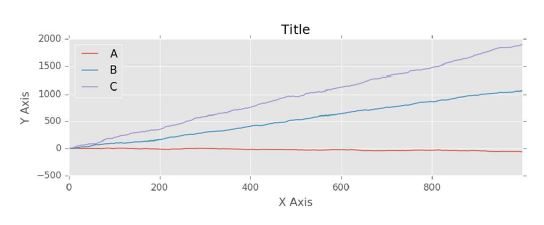

In [5]:
# Toto je čiarový graf (line plot)
from IPython.display import Image
Image(filename='graf_ciarovy.JPG')

**Škatuľový graf (box plot)**

In [ ]:
ax = df.plot.box(vert=False)
# nasleduje štandardný kód grafu, ako je uvedené vyššie

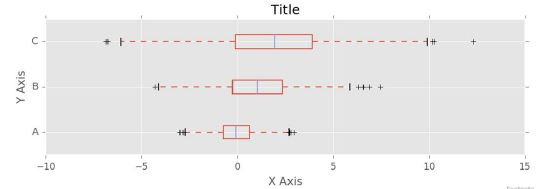

In [6]:
# Škatuľový graf (box plot)
Image(filename='graf_skatulovy.JPG')

In [ ]:
ax = df.plot.box(column='c1', by='c2')

**Histogram**

In [ ]:
ax = df['A'].plot.hist(bins=20)
# nasleduje štandardný kód grafu, ako je uvedené vyššie

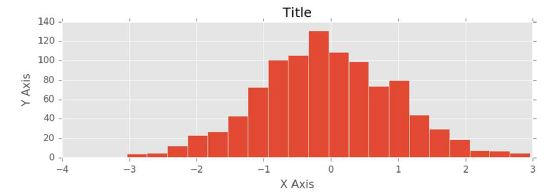

In [7]:
Image(filename='histogram.JPG')

**Viacnásobné histogramy (prekrývajúce sa alebo skladané)**

In [ ]:
ax = df.plot.hist(bins=25, alpha=0.5) # alebo...
ax = df.plot.hist(bins=25, stacked=True)
# nasleduje štandardný kód grafu, ako je uvedené vyššie

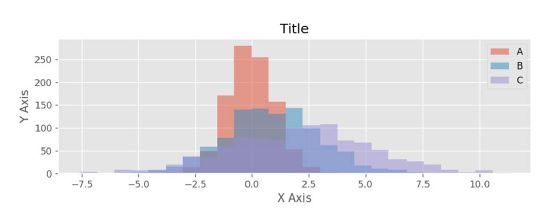

In [8]:
Image(filename='viacnasobny_histogram1.JPG')

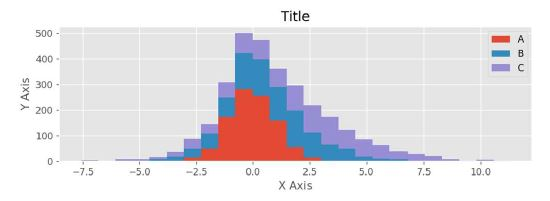

In [9]:
Image(filename='viacnasobny_histogram2.JPG')

**Stĺpcové grafy (bar plots)**

In [ ]:
bins = np.linspace(-10,15,26)
binned = pd.DataFrame()
for x in df.columns:
y=pd.cut(df[x],bins,labels=bins[:-1])
y=y.value_counts().sort_index()
binned = pd.concat([binned,y],axis=1)
binned.index = binned.index.astype(float)
binned.index += (np.diff(bins) / 2.0)
ax = binned.plot.bar(stacked=False,
width=0.8) # for bar width
# nasleduje štandardný kód grafu, ako je uvedené vyššie

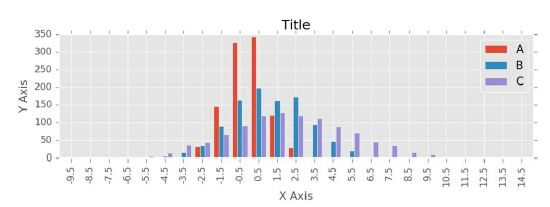

In [10]:
Image(filename='graf_stlpcovy.JPG')

**Horizontálne stĺpcové grafy (horizontal bars)**

In [ ]:
ax = binned['A'][(binned.index >= -4) &
(binned.index <= 4)].plot.barh()
# nasleduje štandardný kód grafu, ako je uvedené vyššie

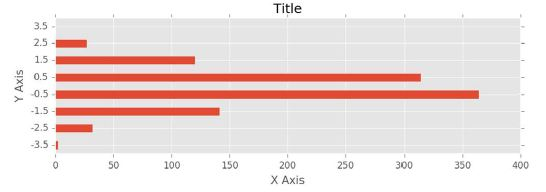

In [11]:
Image(filename='graf_horizontalny_stlpcovy.JPG')

**Graf hustoty (density plot)**

In [ ]:
ax = df.plot.kde()
# nasleduje štandardný kód grafu, ako je uvedené vyššie

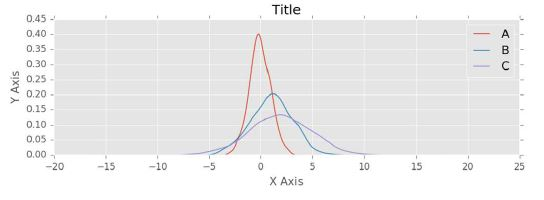

In [12]:
Image(filename='graf_hustoty.JPG')

**Bodový graf (scatter plot)**

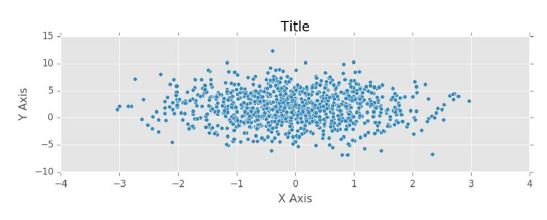

In [13]:
Image(filename='graf_bodovy.JPG')

**Koláčový graf (pie chart)**

In [ ]:
s = pd.Series(data=[10, 20, 30],
    index = ['dogs', 'cats', 'birds'])
ax = s.plot.pie(autopct='%.1f')

# nasleduje štandardný výstup grafu ...
ax.set_title('Pie Chart')
ax.set_aspect(1) # urobí kruh
ax.set_ylabel('') # odstrániť predvolené

fig = ax.figure
fig.set_size_inches(8, 3)
fig.savefig('filename.png', dpi=125)

plt.close(fig)

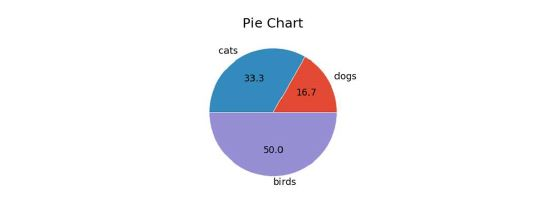

In [14]:
Image(filename='graf_kolacovy.JPG')

**Zmena vykresleného rozsahu**

In [ ]:
ax.set_xlim([-5, 5])
# pre nejaké biele miesto na grafe ...
lower, upper = ax.get_ylim()
ax.set_ylim([lower-1, upper+1])

**Pridajte do grafu poznámku pod čiarou**

In [ ]:
# po fig.tight_layout(pad=1) vyššie
fig.text(0.99, 0.01, 'Footnote',
ha='right', va='bottom',
fontsize='x-small',
fontstyle='italic', color='#999999')

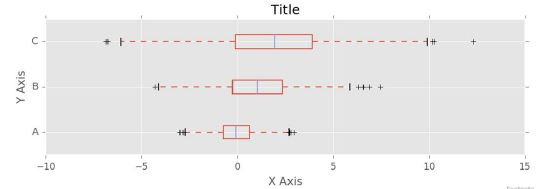

In [15]:
Image(filename='graf_skatulovy.JPG')

**Čiara a pruh na rovnakom grafe**<br>
V matplotlib stĺpcové grafy vizualizujú údaje kategórií alebo diskrétne
údaje. Čiarové grafy zobrazujú súvislé údaje. Toto robí
je ťažké získať stĺpce a čiary na rovnakom grafe. Typicky
kombinované grafy majú buď príliš veľa štítkov a/alebo
čiary a pruhy sú nesprávne zarovnané alebo chýbajú. Musíte
trik matplotlib trochu ... pandas uľahčuje tento trik

In [ ]:
# začnite s falošnými údajmi o percentuálnom raste
s = pd.Series(np.random.normal(
    1.02, 0.015, 40))
s = s.cumprod()
dfg = (pd.concat([s / s.shift(1),
        s / s.shift(4)], axis=1) * 100) - 100
dfg.columns = ['Quarter', 'Annual']
dfg.index = pd.period_range('2010-Q1',
        periods=len(dfg), freq='Q')

# preindexovať s celými číslami od 0; ponechať staré
old = dfg.index
dfg.index = range(len(dfg))

# nakreslí čiaru pomocou pandas
ax = dfg['Annual'].plot(color='blue',
    label='Year/Year Growth')

# nakreslí stĺpec pomocou pandas
dfg['Quarter'].plot.bar(ax=ax,
        label='Q/Q Growth', width=0.8)

# preznačte os x vhodnejšie
ticks = dfg.index[((dfg.index+0)%4)==0]
labs = pd.Series(old[ticks]).astype(str)
ax.set_xticks(ticks)
ax.set_xticklabels(labs.str.replace('Q',
        '\nQ'), rotation=0)

# opraviť rozsah osi x ... preskočiť 1.
ax.set_xlim([0.5,len(dfg)-0.5])

# pridanie legendy
l=ax.legend(loc='best',fontsize='small')

# dokončiť a sprisahať obvyklým spôsobom
ax.set_title('Fake Growth Data')
ax.set_xlabel('Quarter')
ax.set_ylabel('Per cent')

fig = ax.figure
fig.set_size_inches(8, 3)
fig.tight_layout(pad=1)
fig.savefig('filename.png', dpi=125)

plt.close()

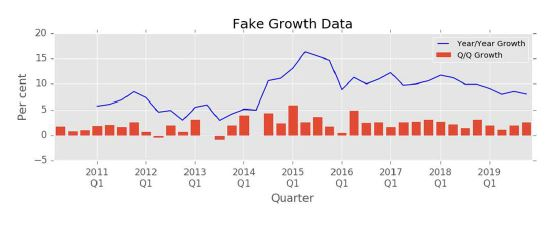

In [16]:
Image(filename='graf_ciarovy_stlpcovy.JPG')

<div class="alert alert-block alert-warning">
<b>Práca s chýbajúcimi a neobmedzenými údajmi</b> 
</div>

**Práca s chýbajúcimi údajmi**<br>
Pandas používa konštruktor not-a-number (`np.nan` and
`float('nan')`) na označenie chýbajúcich údajov. Python None
môže vzniknúť aj v dátach. Tiež sa považuje za chýbajúce
údaje; ako je panda nie-a-time konštrukcia
(`pandy.NaT`).

**Chýbajúce údaje v Series**

In [ ]:
s = Series( [8,None,float('nan'),np.nan])
           #[8,     NaN,   NaN,   NaN]
s.isnull() #[False, True,  True,  True]
s.notnull()#[True,  False, False, False]
s.fillna(0)#[8,     0,     0,     0]

**Chýbajúce údaje v DataFrame**

In [ ]:
df = df.dropna() # odstráni všetky riadky s NaN
df = df.dropna(axis=1) # to isté pre stĺpce
df=df.dropna(how='all') # vypustite všetky riadky NaN
df=df.dropna(thresh=2) # odstráni 2+ NaN v riadku
# vypustiť riadok iba vtedy, ak NaN v špecifikovanom stĺpci
df = df.dropna(df['col'].notnull())

**Prekódovanie chýbajúcich údajov**

In [ ]:
df.fillna(0, inplace=True) # np.nan -> 0
s = df['col'].fillna(0) # np.nan -> 0
df = df.replace(r'\s+', np.nan,
    regex=True) # biele miesta -> np.nan

**Nekonečné čísla**<br>
S číslami s pohyblivou desatinnou čiarkou to pandy zabezpečujú
kladné a záporné nekonečno.

In [ ]:
s = Series([float('inf'), float('-inf'),
    np.inf, -np.inf])

Pandas zaobchádza s celočíselnými porovnaniami plus alebo mínus
nekonečno podľa očakávania.

**Testovanie na konečné čísla**<br>
(pomocou údajov z predchádzajúceho príkladu)

In [ ]:
b = np.isfinite(s)

<div class="alert alert-block alert-warning">
<b>Práca kategorickými údajmi</b> 
</div>

**Kategorické údaje**<br>
Séries pandas má typ údajov podobný faktorom R
kódovanie kategorických údajov.

In [ ]:
s = Series(['a','b','a','c','b','d','a'],
    dtype='category')
df['B'] = df['A'].astype('category')

*Poznámka:* kľúčom je špecifikovať typ údajov „kategória“.<br>
*Poznámka:* kategórie budú zoradené pri vytvorení, ak sú
zoradené. Toto sa dá vypnúť. Pozri objednávku nižšie.

**Previesť späť na pôvodný typ údajov**

In [ ]:
s = Series(['a','b','a','c','b','d','a'],
    dtype='category')
s = s.astype('string')

**Usporiadanie, preraďovanie a triedenie**

In [ ]:
s = Series(list('abc'), dtype='category')
print (s.cat.ordered)
s=s.cat.reorder_categories(['b','c','a'])
s = s.sort()
s.cat.ordered = False

*Upozornenie:* Kategória musí byť usporiadaná, aby mohla byť triedená

**Premenovanie kategórií**

In [ ]:
s = Series(list('abc'), dtype='category')
s.cat.categories = [1, 2, 3] # in place
s = s.cat.rename_categories([4,5,6])
# pomocou comprehension ...
s.cat.categories = ['Group ' + str(i)
for i in s.cat.categories]

*Upozornenie:* kategórie musia byť jednoznačne pomenované

**Pridávanie nových kategórií**

In [ ]:
s = s.cat.add_categories([4])

**Odstránenie kategórií**

In [ ]:
s = s.cat.remove_categories([4])
s.cat.remove_unused_categories() # vhodný

<div class="alert alert-block alert-warning">
<b>Práca s reťazcami</b> 
</div>

**Práca s reťazcami**

In [ ]:
# predpokladajme, že df['col'] je séria reťazcov
s = df['col'].str.lower()
s = df['col'].str.upper()
s = df['col'].str.len()

# ďalšia sada funguje ako Python
df['col'] += 'suffix' # pridanie
df['col'] *= 2 # duplikovanie
s = df['col1'] + df['col2'] # zreťazenie

Väčšina funkcií reťazca python je replikovaná v pandas
Objekty DataFrame a Series.

**Regular expressions**

In [ ]:
s = df['col'].str.contains('regex')
s = df['col'].str.startswith('regex')
s = df['col'].str.endswith('regex')
s = df['col'].str.replace('old', 'new')
df['b'] = df.a.str.extract('(pattern)')

*Poznámka:* pandas majú oveľa viac metód regulárneho výrazu.

<div class="alert alert-block alert-warning">
<b>Základná štatistika</b> 
</div>

**Súhrnná štatistika**

In [ ]:
s = df['col1'].describe()
df1 = df.describe()

**DataFrame - kľúčové štatistické metódy**

In [ ]:
df.corr() # párová korelácia stĺpcov
df.cov() # párová kovariancia stĺpcov
df.kurt() # špičatosť nad stĺpcom (def)
df.mad() # stredná absolútna odchýlka
df.sem() # štandardná chyba priemeru
df.var() # rozptyl oproti stĺpcom (def)

**Počet hodnôt**

In [ ]:
s = df['col1'].value_counts()

**Krížová tabuľka (počet frekvencií)**

In [ ]:
ct = pd.crosstab(index=df['a'],
    cols=df['b'])

**Quantiles and ranking**

In [ ]:
quants = [0.05, 0.25, 0.5, 0.75, 0.95]
q = df.quantile(quants)
r = df.rank()

**Histogram predbežného spracovania dát**

In [ ]:
count, bins = np.histogram(df['col1'])
count, bins = np.histogram(df['col'],
                bins=5)
count, bins = np.histogram(df['col1'],
                bins=[-3,-2,-1,0,1,2,3,4])

**Regresia**

In [ ]:
import statsmodels.formula.api as sm
result = sm.ols(formula="col1 ~ col2 +
        col3", data=df).fit()
print (result.params)
print (result.summary())

**Jednoduchý príklad vyhladzovania pomocou valcovania**

In [ ]:
k3x5 = np.array([1,2,3,3,3,2,1]) / 15.0
s = df['A'].rolling(window=len(k3x5),
    min_periods=len(k3x5),
    center=True).apply(
        func=lambda x: (x * k3x5).sum())
# opraviť chýbajúce koncové údaje ... nevyhladené
s = df['A'].where(s.isnull(), other=s)

<div class="alert alert-block alert-warning">
<b>Výstražná poznámka</b>
</div>

Tento ťahák dláždili dohromady neúnavní roboti
túlať sa po temných zákutiach internetu a hľadať medvedíka
a anguin mýty z bájnej krajiny mlieka a medu
kde sa hovorí o pandas a python gambol
spolu. Neexistuje žiadna záruka, že príbehy boli
presne zachytené a prepísané. Používate tieto
poznámky na vlastné riziko. Bol si varovaný. nebudem
niesť zodpovednosť za čokoľvek, čo sa vám stane a
tých, ktorých milujete, keď vaše oči začnú vidieť, čo je
napísané tu.

*Verzia:* Tento cheat bol naposledy aktualizovaný pomocou
Myslite na Python 3.6 a pandy 0.19.2.

*Chyby:* Ak nájdete nejaké chyby, pošlite mi e-mail na adresu
markthegraph@gmail.com; (ale prosím neopravujte
moje používanie austrálsko-anglických pravopisných konvencií).

*Preklad do SJ:* Viera Marion Rajnáková a hlavne Google Translator